## Simulating  Active Brownian motion
In this notebook, we simulate the trajectory of a single, non-interacting active Brownian particle. Unlike passive Brownian particles (e.g. pollen grains in water) that do diffusive random walks, active Brownian particles (ABPs) propel themselves with directed motion in addition to diffusing randomly. 

The APB model can be used to accurately desribe the motion of certain types of cells, those which locomote actively using focal adhesions. The distribution of focal adhesions within a cell may vary continuously, tending to reorient the cell with respect to it's past momentum and giving rise to different speeds with which the cell moves. It is this angular reorientation which can be modelled as a diffusive process.

Durotaxis is the preference for cells to move preferentially towards a stiffer substrate. In this project we implement durotaxis by incorporating the dependence of a cell's rotational diffusion properties on the stiffness of the medium upon which a cell is crawling.

*It should be noted that although all of the simulations in this project display the trajectories or data associated with numerous cells, intercellular interactions are not taken into account here. This is a simple single cell model.*

In [201]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import random as rand
from scipy import stats

import os.path
from os import path

### 2D ABP model, confined system
In the following cell, we implement and plot multiple 2D active brownian particle's motions by keeping track of their positions (x,y) and 
angles $\theta$. Notice that we do a ballistic step (proportional to $dt$) and random walk in the space of $\theta$-values. 

Furthermore we implement walled boundary conditions here, treating a wall as a reflecting surface. If a walker goes beyond the confining boundary of the box, it's position is altered so as to keep it in the box. Note that when this reflection of a walker by a boundary occurs, the velocity of the walker is not infuenced by the reflection.

### 2D ABP model: Confined durotaxis
In the following cell, we incorporate substrate stiffness into the model. Specifically the stiffness will depend on the location of a walker within the confining box. To the left the substrate is more soft, to the right it is more stiff, and in the center is a transition region. The rotational diffusion constant of each walker is then made to depend on the stiffness of the substrate upon which it is walking, so that a walker in the stiffer region will be taking steps more ballistically, while a walker in the softer region will be taking steps more diffusively. 

In [225]:
#  ABP model

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =1.0; dt = 0.01; Drot0 = 5; Dtrans = 0.001;

#bounding size of box
Bbox = 20
Bframe = Bbox/10

#substrate parameters: soft and hard stiffness, transition region width
ks = 1
kh = 50

num_walks = 1000;

num_steps = 1000;

Larr = [Bbox/20, Bbox/10, Bbox/6.6666666]
NL = int(len(Larr))


Di = np.empty((NL,num_walks,int(num_steps/10)))

for l in range(NL):
    
    L = Larr[l]

    for j in range(num_walks):
    
        # initialize arrays that store x,y and theta values, as well as initial particle position and angle

        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0)
        x=0.0; y = 0.0; theta = (2*np.pi)*rand(1)
        xvec = np.append(xvec,x); yvec = np.append(yvec,y); thetavec = np.append(thetavec, theta)

        dj = np.empty(int(num_steps/10))
    
        for i in range(num_steps):
        
            #determine substrate stiffness based on position
            if x > -L and x < L:
                k = ks + ((kh-ks)/(2*L))*(x + L)
            elif x > L:
                k = kh
            elif x < -L:
                k = ks
            
            #calculate rotational diffusion constant based on substrate stiffness
            Drot = Drot0/k
            
            # calculate diffusive/random steps. For the x- and y-,we generate 
            #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
            dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1) - 0.5);
            # update coordinates (including ballistic step)
            x += vel*dt*np.cos(theta) + dx 
            y += vel*dt*np.sin(theta) + dy
            # implement walled boundary conditions
            if x > Bbox/2:
                x -= 2*(x - Bbox/2)
            elif x < -Bbox/2:
                x -= 2*(x + Bbox/2)
            elif x < Bbox/2 and x > -Bbox/2:
                x += 0
            
            if y > Bbox/2:
                y -= 2*(y - Bbox/2)
            elif y < -Bbox/2:
                y -= 2*(y + Bbox/2)
            elif y < Bbox/2 and y > -Bbox/2:
                y += 0
            
        
            # store successive positions in arrays
            xvec = np.append(xvec,x); yvec = np.append(yvec,y) 
            # update the angle and store in array
            theta += dtheta
            thetavec = np.append(thetavec, theta)
    
        for k in range(int(num_steps/10)):
        
            if (xvec[10*(k+1)] - xvec[10*k]) > 0:
        
                dj[k] =  1
        
            elif (xvec[10*(k+1)] - xvec[10*k]) < 0:
            
                dj[k] = -1
        
        Di[l,j] = dj 

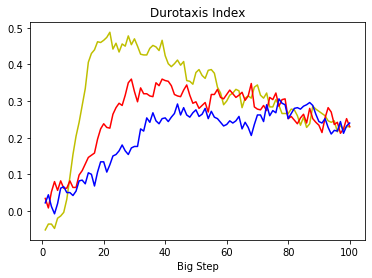

In [226]:
bigsteps = np.linspace(1,int(num_steps/10),int(num_steps/10))

plt.plot(bigsteps, Di[0].sum(0)/num_walks, 'y-')
plt.plot(bigsteps, Di[1].sum(0)/num_walks, 'r-')
plt.plot(bigsteps, Di[2].sum(0)/num_walks, 'b-')
plt.title('Durotaxis Index')
plt.xlabel('Big Step');

plt.savefig('Durotaxis index.png')

In [103]:
def truncate(num, decimal = 0):
    mult = 10 ** decimal
    return int(num * mult)/mult

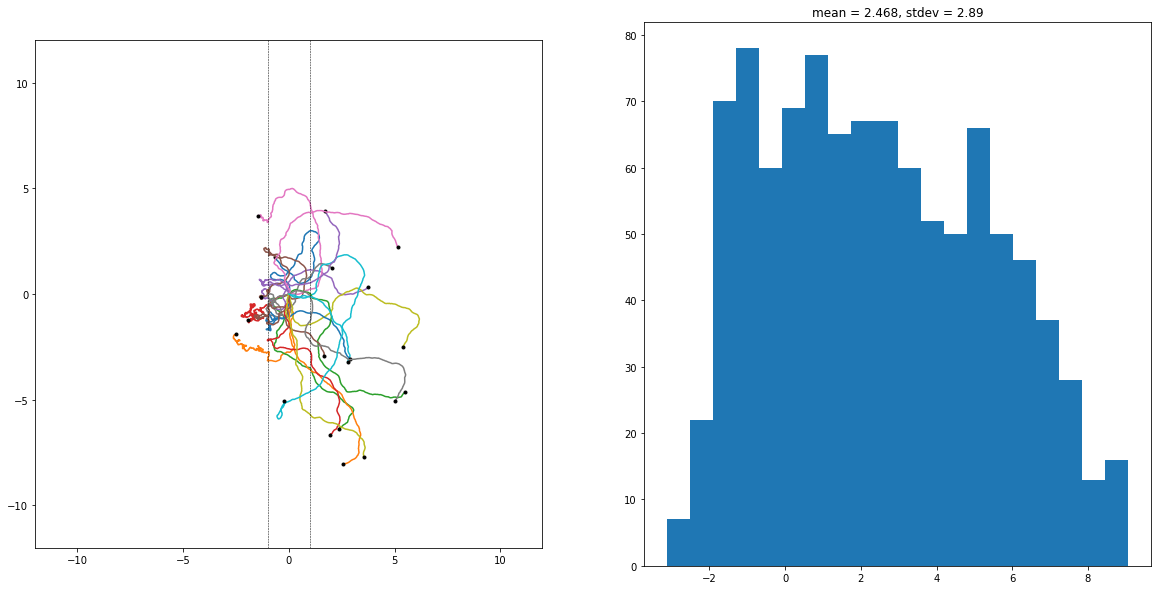

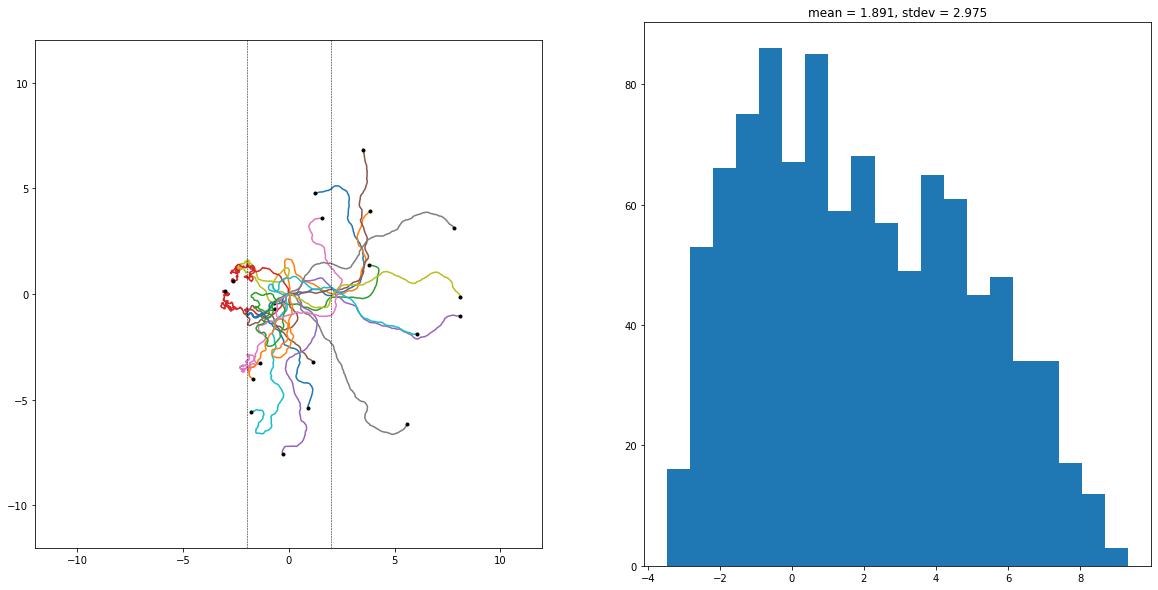

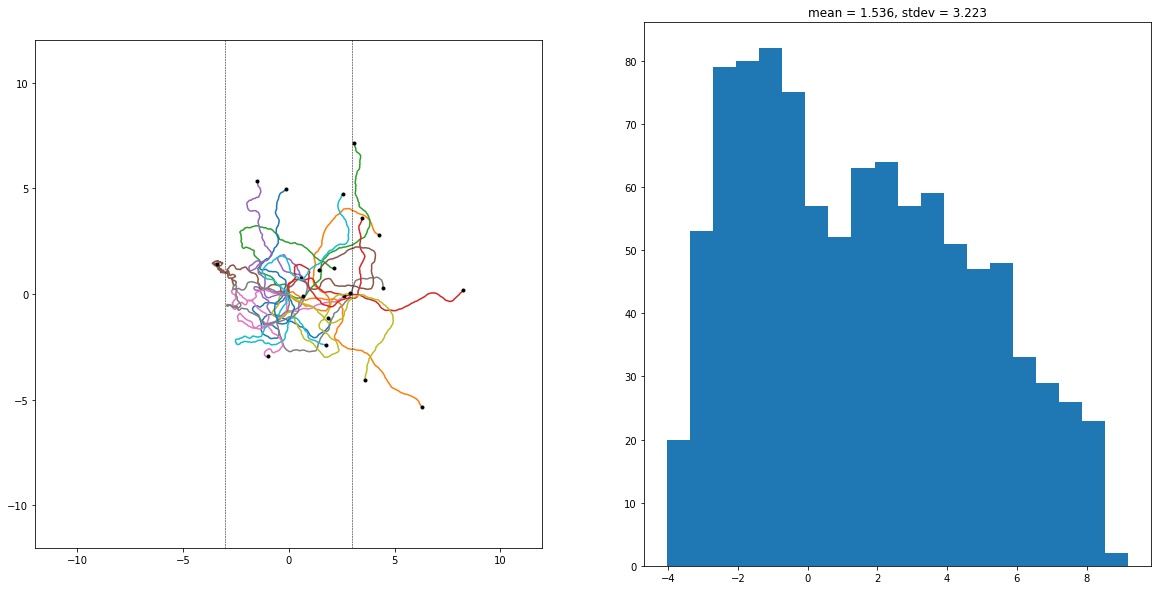

In [224]:
#  ABP model

#ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
vel =1.0; dt = 0.01; Drot0 = 5; Dtrans = 0.001;

#bounding size of box
Bbox = 20
Bframe = Bbox/10

#substrate parameters: soft and hard stiffness, transition region width
ks = 1
kh = 50

num_walks = 1000;

Larr = [Bbox/20,Bbox/10,Bbox/6.66666666]
NL = len(Larr)

for k in range(NL):

    plt.figure(figsize=(20,10))
    
    L = Larr[k]
    
    xdata = np.empty(num_walks)
    
    plt.subplot(121)
    
    for j in range(num_walks):
    
        # initialize arrays that store x,y and theta values, as well as initial particle position and angle

        xvec=np.zeros(0); yvec=np.zeros(0); thetavec = np.zeros(0)
        x=0.0; y = 0.0; theta = (2*np.pi)*rand(1)
        xvec = np.append(xvec,x); yvec = np.append(yvec,y); thetavec = np.append(thetavec, theta)

        num_steps = 1000;
        
        for i in range(num_steps):
        
            #determine substrate stiffness based on position
            if x > -L and x < L:
                k = ks + ((kh-ks)/(2*L))*(x + L)
            elif x > L:
                k = kh
            elif x < -L:
                k = ks
            
            #calculate rotational diffusion constant based on substrate stiffness
            Drot = Drot0/k
            
            # calculate diffusive/random steps. For the x- and y-,we generate 
            #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
            dx = np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            dy= np.sqrt(2*Dtrans*dt)*2*(rand(1)-0.5); 
            dtheta = np.sqrt(2*Drot*dt)*(2*np.pi)*(rand(1) - 0.5);
            # update coordinates (including ballistic step)
            x += vel*dt*np.cos(theta) + dx 
            y += vel*dt*np.sin(theta) + dy
            # implement walled boundary conditions
            if x > Bbox/2:
                x -= 2*(x - Bbox/2)
            elif x < -Bbox/2:
                x -= 2*(x + Bbox/2)
            elif x < Bbox/2 and x > -Bbox/2:
                x += 0
            
            if y > Bbox/2:
                y -= 2*(y - Bbox/2)
            elif y < -Bbox/2:
                y -= 2*(y + Bbox/2)
            elif y < Bbox/2 and y > -Bbox/2:
                y += 0
            
        
            # store successive positions in arrays
            xvec = np.append(xvec,x); yvec = np.append(yvec,y) 
            # update the angle and store in array
            theta += dtheta
            thetavec = np.append(thetavec, theta)
        xdata[j] = xvec[-1]
        if j < 20:
            plt.plot(xvec,yvec, '-')
            plt.plot(xvec[-1], yvec[-1], 'k.')
            plt.axis([-Bbox/2 - Bframe ,Bbox/2 + Bframe,-Bbox/2 - Bframe,Bbox/2 + Bframe], 'equal');
            plt.gca().set_aspect(1)
    plt.axvline(x = L, linewidth = 0.5, color = 'k', linestyle = '--');
    plt.axvline(x = -L, linewidth = 0.5, color = 'k', linestyle = '--');
    
    xmean = truncate(np.mean(xdata), 3)
    xstd = truncate(np.std(xdata), 3)
    
    plt.subplot(122)
    plt.hist(xdata,20)
    plt.title(f'mean = {xmean}, stdev = {xstd}')
    
    plt.savefig(f'dtax_traj+hist, L ={L}, run2.png')

It seems as though Drot must be chosen very carefully. If it is too small then the walkers exhibit more ballistic motion even on the softer substrate, and we don't see the behavioral distinction that we are trying to produce. 

At the same time Dtrans must also be chosen rather carefully, as the ratio of these two diffusion constants is a factor in the ballisticity of any of these walkers in a given region. 

It appears as thought for wider transition regions, less walkers make it to the soft region, which can be explained as walkers having more "time" in the transition region to "feel" the stiffness gradient.

However for the given runtime chosen, it does look like the mean x value of these walkers decreases with increasing region width. This may be indicative of the fact that the *gradient* of the stiffness is actually greater in a narrower transition region, and it is this gradient which the walkers will tend to feel in shorter time periods.

Now let's define a function that calculates the MSD of many walkers by averaging over the MSD of all the walkers at each time step. Currently this function is implementing durotaxis and the walled BCs by looping through all of the walkers and executing many if statements for each walker, I'm wondering if there is a more elegant way to achieve this though...?

In [199]:
def get_msd_durotaxis(num_walks, num_steps, dt, L):

    #ABP model parameters: ballistic velocity, time step, rotational diffusion constant, translational diffusion constant
    vel =1.0; 
    Drot0 = 5; Dtrans = 0.001;

    #bounding size of box
    Bbox = 20

    #substrate parameters: soft and hard stiffness
    ks = 1
    kh = 50

    
    # initialize arrays that store x,y and theta values, as well as initial particle position and angle
    #num_walks = 1000
    x_vals = np.zeros(num_walks); y_vals = np.zeros(num_walks); theta_vals = 2*np.pi*(rand(num_walks) - 0.5)
    displacement = np.zeros(num_walks); msd_at_step = np.zeros(num_steps); k_vals = np.ones(num_walks)
    Drot_vals=np.zeros(num_walks);

    for i in range(num_steps):
        for j in range(num_walks):
            if x_vals[j] > Bbox/2:
                x_vals[j] -= 2*(x_vals[j] - Bbox/2)
            elif x_vals[j] < -Bbox/2:
                x_vals[j] -= 2*(x_vals[j] + Bbox/2)
            elif x_vals[j] < Bbox/2 and x_vals[j] > -Bbox/2:
                x_vals[j] += 0
            
            if y_vals[j] > Bbox/2:
                y_vals[j] -= 2*(y_vals[j] - Bbox/2)
            elif y_vals[j] < -Bbox/2:
                y_vals[j] -= 2*(y_vals[j] + Bbox/2)
            elif y_vals[j] < Bbox/2 and y_vals[j] > -Bbox/2:
                y_vals[j] += 0
            
            #determine substrate stiffness based on position
            if x_vals[j] > -L and x_vals[j] < L:
                k_vals[j] = ks + ((kh-ks)/(2*L))*(x_vals[j] + L)
            elif x_vals[j] > L:
                k_vals[j] = kh
            elif x_vals[j] < -L:
                k_vals[j] = ks
            
            #calculate rotational diffusion constant based on substrate stiffness 
        Drot_vals = Drot0/k_vals
        
            
            # calculate diffusive/random steps. For the x- and y-,we generate 
            #a random number between -1 & 1 to ensure that the walker can step in both directions(up/down and left/right).
            # update coordinates (including ballistic step along angle and diffusive step)
        x_vals += vel*dt*np.cos(theta_vals) + np.sqrt(2*Dtrans*dt)*2*(rand(num_walks)-0.5);
        y_vals += vel*dt*np.sin(theta_vals) + np.sqrt(2*Dtrans*dt)*2*(rand(num_walks)-0.5) 
            #msd_at_step = np.append(msd_at_step, np.mean(displacement**2))
            # update angles by rotational diffusion step
        for k in range(num_walks):
            theta_vals[k] += 2*np.pi*np.sqrt(2*Drot_vals[k]*dt) * rand(1)
                
        displacement = (x_vals**2 + y_vals**2)
            # store msd after every interval steps
        msd_at_step[i] = np.mean(displacement)
        
    time_at_step = np.linspace(0, num_steps*dt, num_steps)        
        
    return time_at_step, msd_at_step

I had to add in a lot more for loops than I would have liked into my get_MSD function. Essentially since each walker will be feeling the substrate according to their local position, I cannot simply update the location and orientation values of all of the walkers simultaneously according to the universal diffusion constants. Instead I had to define the diffusion constants based on each walkers position, and then update the orientation accordingly. To do this I needed to loop through all of the walkers individual positions (making sure they don't stray outside of my bounding box), assigning the rotational diffusion constant to each walker as I read off it's position.

The following cell executes the above cell and plots the MSD data, the function has been written so that onemay alter the size of the transition region (I will also make it so that the substrate stiffness on either side can be changed as well). I've plotted the results on a linear graph just to ensure that the MSD is not straying outside the bounding region, but even when plotted on a loglog scale the MSD data does not look very similar to that from the simpler ABP model. I'm wondering if this should be the case or if there is a bug in my code?

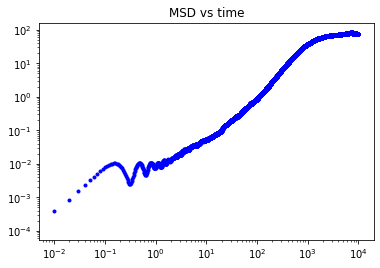

In [205]:
num_steps = 10**6
num_walks = 100
dt = 0.01
L = 2
time_at_step, msd_at_step = get_msd_durotaxis(num_walks, num_steps, dt, L)

plt.loglog(time_at_step,msd_at_step, 'b.');
plt.title('MSD vs time')

filename = 'durotaxis_MSD.png'
plt.savefig(filename)